In [ ]:
# organizational network analysis 
# ONA
# Graph theory
# discrete mathematics for managers 
# discrete mathematics for HR professionals
# social network analysis 
# combinatorics made easy 
# do managers need to be good mathematicians? :) :) :) 
#Kumaran Ponnambalam some code snippets modified from_lynda.

In [ ]:
#Mounting your drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
#installing dependencies 
import networkx as nx  #network python library 
import matplotlib.pyplot as plt #visualization python library
from csv import reader #reading CSV files 
import pandas as pd #spreadsheets python library 

In [2]:
#Input file with one record per chat collaboration
chat_csv = "/content/chat_csv.csv"

#Data frame to store employee pairs.
employee_pairs = pd.DataFrame(columns=['First', 'Second', 'Count'])

#Read file and extract pairs and weights
with open(chat_csv, 'r', encoding="utf-8-sig") as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        #Sort by employee name
        row.sort()
        #sort and filter for only valid names
        filtered_row = [ emp for emp in row
                        if len(emp) > 0] 

        #Generate employee pairs
        
        #Iterate for the first employee
        for i in range(0, len(filtered_row)-1):
            #Iterate for the second employee
            for j in range(i+1,len(filtered_row) ):
            
                first=filtered_row[i]
                second=filtered_row[j]

                #Create the pair record. If Dataframe record already exists
                #Update the count. If not, create it
                curr_rec = employee_pairs[
                                (employee_pairs['First'] == first )
                                & (employee_pairs['Second'] == second)]

                if ( curr_rec.empty) :
                    new_df = pd.DataFrame([{'First': first,
                                            'Second' : second,
                                            'Count':1}])
                    employee_pairs=employee_pairs.append(new_df,
                                                         ignore_index=True)

                else:
                    curr_rec.at[curr_rec.index[0],'Count'] = curr_rec.at[curr_rec.index[0],'Count'] + 1
                    employee_pairs.update(curr_rec)
                
print(employee_pairs)

        First     Second Count
0   mahmoud h  mohamed m    13
1   mohamed m      yomna     9
2       fatma  mohamed m    11
3       fatma  mahmoud h     9
4       fatma      yomna     8
5   mahmoud h      yomna     9
6       fatma      hatem     4
7       hatem  mahmoud h     7
8       hatem  mohamed m     7
9       hatem      yomna     4
10  mahmoud f  mohamed m     5
11      fatma  mahmoud f     2
12      fatma      sayed     1
13      hatem  mahmoud f     2
14      hatem      sayed     2
15  mahmoud f      sayed     6
16  mohamed m      sayed     2
17  mahmoud f  mahmoud h     2
18       dina  mahmoud f     6
19       dina  mahmoud h     1
20       dina  mohamed m     1
21       dina       heba     3
22       dina      sayed     4
23       heba  mahmoud f     4
24       heba      sayed     3


In [3]:
#Create a network  graph using NetworkX python library f
graph_emps  = nx.Graph()

#Add Edges based on the dataframe (nodes gets added automatically)
for i,row in employee_pairs.iterrows():
    graph_emps.add_edge(row['First'],  
                        row['Second'],   
                        weight=row['Count'])

# network summary
print("Network summary: \n----------------\n", nx.info(graph_emps))

Network summary: 
----------------
 Name: 
Type: Graph
Number of nodes: 9
Number of edges: 25
Average degree:   5.5556


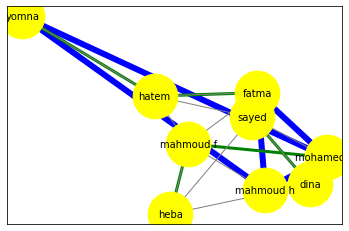

In [4]:
# Create different types of edges based on their cohesion

#Pairs with Count > 8 for high cohesion
elarge = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if data['weight'] > 8]

#Pairs with Count between 4 and 5 for medium cohesion
emedium = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if  3 < data['weight'] <= 5]

#Pairs with Count less than 4 for low cohesion
esmall = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if data['weight'] <= 4]

pos = nx.kamada_kawai_layout(graph_emps)  # positions for all nodes

## Setup the Graph
# nodes
nx.draw_networkx_nodes(graph_emps, pos, 
                       node_size=2000,
                       node_color='yellow')


nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=elarge,
                       width=6,
                       edge_color='blue')

nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=emedium,
                       width=3,
                       edge_color='green')

nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=esmall,
                       width=1, 
                       edge_color='gray')

# labels
nx.draw_networkx_labels(graph_emps, 
                        pos, 
                        font_size=10, 
                        font_family='DejaVu Sans')




plt.axis()
plt.show()


In [7]:
#Function to sort a dictionary by value
def sort_dict(dict):
    sorted_dict= sorted(dict.items(), key=lambda x: x[1],reverse=True)
    
    for key,value in sorted_dict:
        print(key, " = ", value)


#find number of nodes they are connected with
print("\nNodes fatma is connected with :\n--------------------------------------------------------------")
print(nx.degree(graph_emps,'fatma'))

#clustering - how close a team they form
print("\nClustering Co-efficient:\n---------------------------------------------------------------------")
sort_dict(nx.clustering(graph_emps,weight='weight'))

#Find centrality of nodes
print("\nCentrality :\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
sort_dict(nx.degree_centrality(graph_emps))

print("\nBetweenness:\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
sort_dict(nx.betweenness_centrality(graph_emps))



Nodes fatma is connected with :
--------------------------------------------------------------
6

Clustering Co-efficient:
---------------------------------------------------------------------
yomna  =  0.5865598097967267
mahmoud h  =  0.34352106118765424
fatma  =  0.33126701948405884
mohamed m  =  0.3046435247172133
heba  =  0.2980067318231345
hatem  =  0.2920263248315823
mahmoud f  =  0.18638877228977488
dina  =  0.1727044104784424
sayed  =  0.16221026283506473

Centrality :
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
mohamed m  =  0.875
mahmoud f  =  0.875
mahmoud h  =  0.75
fatma  =  0.75
hatem  =  0.75
sayed  =  0.75
dina  =  0.625
yomna  =  0.5
heba  =  0.375

Betweenness:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
mahmoud f  =  0.10634920634920635
sayed  =  0.07738095238095237
mohamed m  =  0.07559523809523809
mahmoud h  =  0.05257936507936508
dina  =  0.044841269841269835
fatma  =  0.035912698412698